In [ ]:
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 관련 라이브러'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report 

'''알고리즘 관련 라이브러'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [ ]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/drive', force_remount=True)

unset HISTFILE; export PS1="root@161dfdbb75ab-36d7b852f7034e448e2e3b11452dac75: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@161dfdbb75ab-36d7b852f7034e448e2e3b11452dac75: umount -f /content/drive || umount /content/drive; pkill -9 -x drive
umount: /content/drive: no mount point specified.
umount: /content/drive: no mount point specified.
root@161dfdbb75ab-36d7b852f7034e448e2e3b11452dac75: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@161dfdbb75ab-36d7b852f7034e448e2e3b11452dac75: ( while `sleep 0.5`; do if [[ -d "/content/drive" && "$(ls -A /content/drive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 117
root@161dfdbb75ab-36d7b852f7034e448e2e3b11452dac75: cat /tmp/tmpuxz23epg/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:1

In [ ]:
os.chdir('./drive/MyDrive/dacon study/')

In [ ]:
data = pd.read_csv('./creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#사기건 수
print(data['Class'].sum())

492


In [ ]:
#nan값 확인
np.isnan(data).sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.apply(lambda x : len(x.unique()))

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [ ]:
#apply 예제
data_apply=data.copy()
data_apply.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#apply
def plus_one(x):
  x+=1
  return x

In [ ]:
data_apply['V1']=data_apply['V1'].apply(plus_one)
data_apply['V1']

0         -0.359807
1          2.191857
2         -0.358354
3          0.033728
4         -0.158233
            ...    
284802   -10.881118
284803     0.267211
284804     2.919565
284805     0.759560
284806     0.466587
Name: V1, Length: 284807, dtype: float64

In [ ]:
#위의 apply 를 lambda버전
data_apply['V1']=data_apply['V1'].apply(lambda x : x+1)

In [ ]:
data_apply['V1']

0         0.640193
1         3.191857
2         0.641646
3         1.033728
4         0.841767
            ...   
284802   -9.881118
284803    1.267211
284804    3.919565
284805    1.759560
284806    1.466587
Name: V1, Length: 284807, dtype: float64

In [ ]:
#피처 행렬 및 레이블 배열 생성
dataX=data.copy().drop(['Class'],axis=1)
dataY=data['Class'].copy()

In [ ]:
dataX.shape , dataY.shape

((284807, 30), (284807,))

In [ ]:
#평균이 0 이고 표준편차가 1인 스탠다드 표준화

In [ ]:
featureToScale=dataX.drop(['Time'],axis=1).columns
featureToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
ss=pp.StandardScaler(copy=True)
dataX.loc[:,featureToScale]=ss.fit_transform(dataX[featureToScale])

In [ ]:
scaling=pd.DataFrame(data=[ss.mean_,ss.scale_],index=['Mean','Std'],columns=featureToScale)
scaling

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
Std,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,1.020711e+00,9.991996e-01,9.952725e-01,9.585939e-01,9.153144e-01,8.762513e-01,8.493356e-01,8.381747e-01,8.140391e-01,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


In [ ]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns, columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

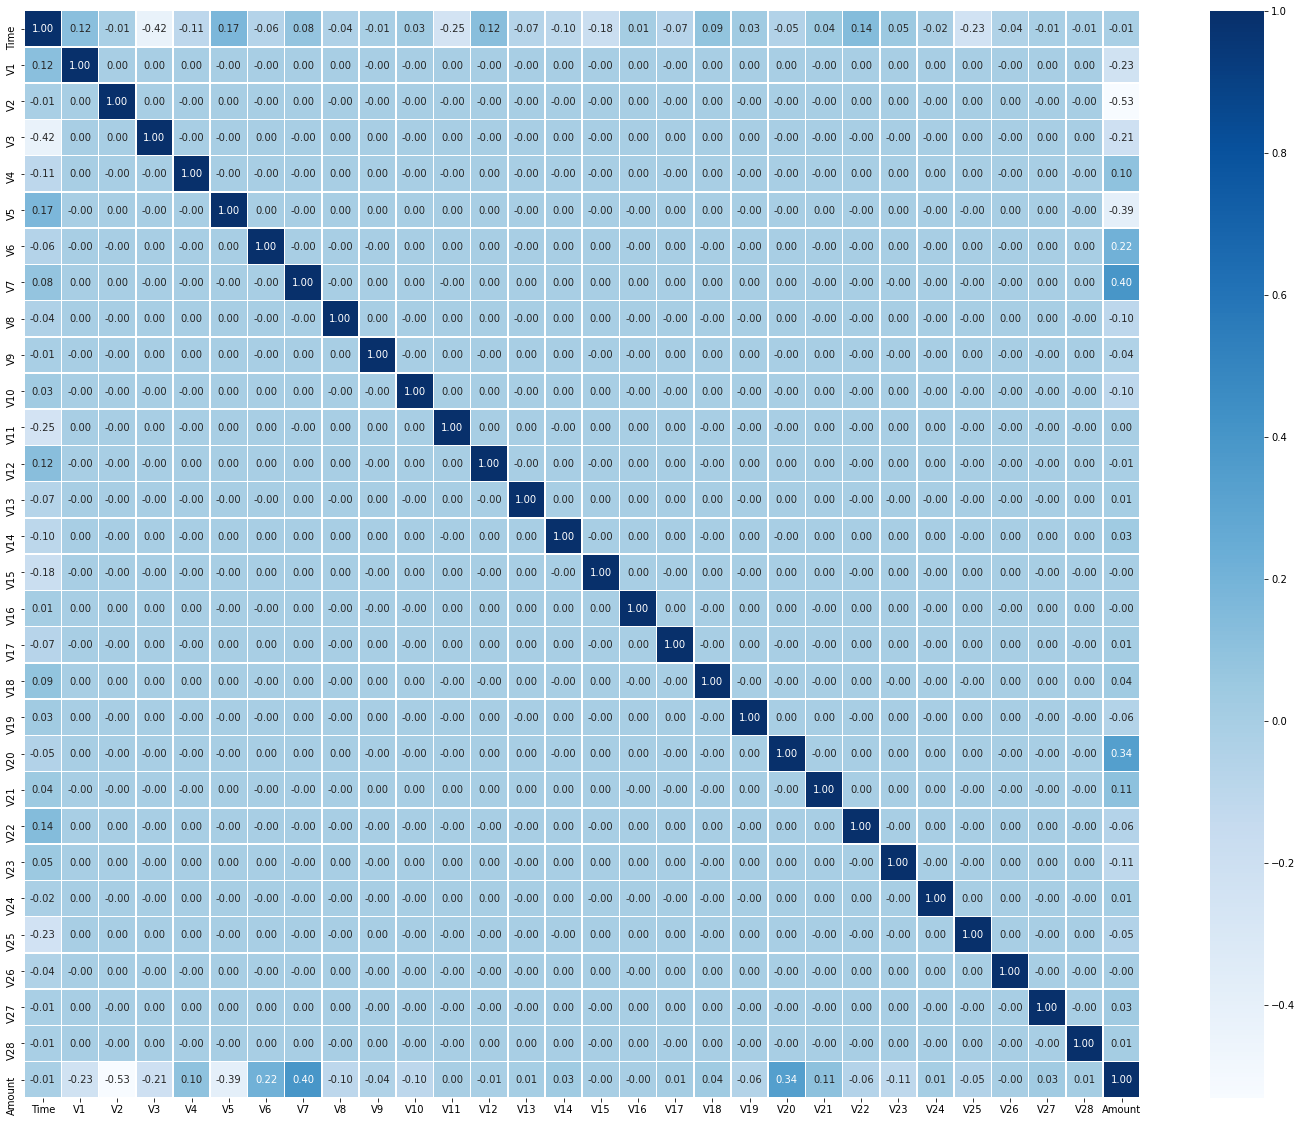

In [ ]:
# annot 은 annotation. 각 셀의 값을 표시할지 결정하는 것
# fmt 는  annot=True 인 경우에, 숫자 표시를 어떻게 할지
# (.2f 는  소수 두번째자리까지 표시하라는 의미입니다.)
# cmap 은 색상을 어떻게 할지

plt.figure(figsize=(25,20))
sns.heatmap(data = dataX.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(dataX, 
                                    dataY, test_size=0.2, 
                                    random_state=2018, stratify=dataY)

In [ ]:
train_x.shape,test_x.shape

((227845, 30), (56962, 30))

In [ ]:
penalty = 'l2' #penalty==가중치규제. 보통 l2가 l1보다 효과적
C = 1.0 #규제강도 낮을수록 regularization 강화->너무 작으면 정확성 떨어지고 너무 크면 overfitting 가능성 높아짐
class_weight = 'balanced' #클래스에 대한 가중치들의 값
random_state = 2018
solver = 'liblinear' #최적화에 사용할 알고리즘
n_jobs = 1 #병렬처리 시 사용할 cpu코어 수

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)
#다양한 파라미터 적용해 실험해보기

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)

logloss_scores = []
model = logReg
for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    model.fit(X_train, y_train)

    predictions=model.predict_proba(X_val) #예측 확률
    
    logloss=log_loss(y_val, predictions)
    logloss_scores.append(logloss)
    print(f"FOLD {n_fold} : logloss:{logloss}")
    
mean_outcome=np.mean(logloss_scores)

print("Mean:{}".format(mean_outcome))

FOLD 0 : logloss:0.11165268402169853
FOLD 1 : logloss:0.10801189996056067
FOLD 2 : logloss:0.1015767133402885
FOLD 3 : logloss:0.10214817566670027
FOLD 4 : logloss:0.1079286926371699
Mean:0.10626363312528357


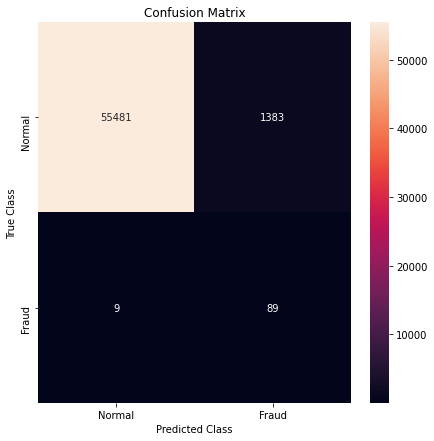

In [ ]:
LABELS = ['Normal', 'Fraud']
pred_y = model.predict(test_x)

conf_matrix = confusion_matrix(test_y, pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

In [ ]:
f1_score(test_y.values, pred_y, average='macro')

0.5504931920706947

In [ ]:
n_estimators = 100 
#max_features = 'auto'
max_depth = 9
min_samples_split = 6
#min_samples_leaf = 1
# min_weight_fraction_leaf = 0.0
# max_leaf_nodes = None
#bootstrap = True
# oob_score = False
n_jobs = -1
random_state = 2021
class_weight = 'balanced'

# RFC = RandomForestClassifier(n_estimators=n_estimators, 
#         max_features=max_features, max_depth=max_depth,
#         min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
#         min_weight_fraction_leaf=min_weight_fraction_leaf, 
#         max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
#         oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
#         class_weight=class_weight)

RFC = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf, n_jobs=n_jobs, random_state=random_state, 
         class_weight=class_weight)

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)


logloss_scores = []
model = RFC
for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    model.fit(X_train, y_train)

    predictions=model.predict_proba(X_val)
    
    logloss=log_loss(y_val, predictions)
    logloss_scores.append(logloss)
    print(f"FOLD {n_fold} : logloss:{logloss}")
    
mean_outcome=np.mean(logloss_scores)

print("Mean:{}".format(mean_outcome))

FOLD 0 : logloss:0.019997004709190202
FOLD 1 : logloss:0.0159954263459494
FOLD 2 : logloss:0.017787594996102062
FOLD 3 : logloss:0.018166564089805666
FOLD 4 : logloss:0.018350144822027833
Mean:0.018059346992615036


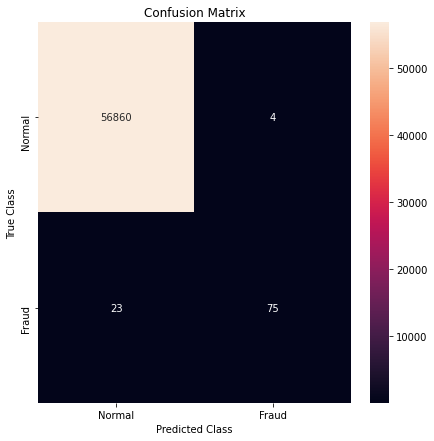

In [ ]:
LABELS = ['Normal', 'Fraud']
pred_y = model.predict(test_x)

conf_matrix = confusion_matrix(test_y, pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

In [ ]:
f1_score(test_y.values, pred_y, average='macro')

0.9236101291105014